# Algoritmo de Gradiente Conjugado (Conjugate Gradient)

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para el algoritmo de gradiente conjugado.

# Preliminares matemáticos

## Conjugate Gradient (CG)
Es una de las técnicas más utilizadas para resolver sistemas de ecuaciones grandes así como problemas de optimización no lineales. El desempeño de CG depende de la distribución de los eigenvalores de la matriz de coeficientes. Por lo tanto, en este cuaderno presentamos el el gradiente conjugado lineal y no lineal.

## Linear Conjugate Gradient
Es un método iterativo para resolver sistemas de ecuaciones lineales de la forma

\begin{equation}
 \label{eqn:linear_system}
 Ax = b,
\end{equation}

donde $A\in \mathbb{R}^{n\times n}$ es una matriz simétrica definida positiva. En el contexto de optimización, podemos plantear el problema \eqref{eqn:linear_system} de la siguiente forma

\begin{equation}
 \underset{x\in \mathbb{R}}{\min} \frac{1}{2}x^{T}Ax-b^{T}x.
\end{equation}

**Definición 1.** Un vector de valores distintos de cero denotado como $\{p_{0},p_{1},\dots,p_{l}\}$ se dice que es conjugado con respecto a la matriz simétrica definida positiva $A$ si

\begin{equation}
 p_{i}^{T}Ap_{j} = 0, \quad \forall i \neq j.
\end{equation}

La importancia del conjugado radica en que podemos minimizar una función en $n$ pasos a lo largo de las direcciones individuales en un conjunto conjugado. 

### Método de dirección conjugada
Dado un punto inicial $x_{0}\in\mathbb{R}^{n}$ y un conjunto de direcciones conjugadas $\{p_{0},p_{1},\dots,p_{n-1}\}$, es posible generar la secuencia $x_{k}$ a partir de la siguiente ecuación

\begin{equation}
 \label{eqn:mdc}
 x_{k+1} = x_{k} + \eta_{k}p_{k},
\end{equation}

donde $\eta_{k}$ es el minimizador de la función cuadrática a lo largo de $x_{k} + \eta p_{k}$ dada como sigue

\begin{equation}
 \label{eqn:alpha_k}
 \eta_{k} = -\frac{r_{k}^{T}p_{k}}{p_{k}^{T}Ap_{k}}.
\end{equation}

**Teorema 1.** Para cualquier punto $x_{0}\in\mathbb{R}^{n}$, la secuencia $x_{k}$ generada por el algoritmo de dirección conjugada \eqref{eqn:mdc}, la Ec. \eqref{eqn:alpha_k} converge a la solución $x^{\star}$ del sistema lineal \eqref{eqn:linear_system} en un máximo de $n$ pasos.

![alg_grad_conj.png](../figures/alg_grad_conj.png)

Otra forma de calcular $\eta_{k}$ se puede obtener aplicando el Teorema de expansión de la minimización del subespacio

\begin{equation}
 \label{eqn:alpha_k2}
 \eta_{k} = \frac{r_{k}^{T}r_{k}}{p_{k}^{T}Ap_{k}},
\end{equation}

\begin{equation}
 \label{eqn:beta_k}
 \beta_{k+1} = \frac{r_{k+1}^{T}r_{k+1}}{r_{k}^{T}r_{k}}.
\end{equation}

Aplicando las Ecs. \eqref{eqn:alpha_k2} y \eqref{eqn:beta_k}, obtenemos la siguiente versión estándar del método de gradiente conjugado

![alg_grad_conj_std.png](../figures/alg_grad_conj_std.png)

## Nonlinear Conjugate Gradient (NCG)

Fletcher y Reeves [1] extendieron el método de gradiente conjugado para funciones no lineales modificando el **Algoritmo 2**. Para ello consideran que $\eta_{k}$ se busca mediante LS para encontrar el mínimo de la función no lineal $f$ en dirección de $p_{k}$. De este modo, el algoritmo modificado se muestra a continuación

![metodo_fr.png](../figures/metodo_fr.png)

donde $\beta_{k+1}^{FR}$ [2] denota el parámetro de Fletcher-Reeves (F-R) dado como sigue

\begin{equation}
 \beta_{k+1}^{FR} :=  \left( \frac{\| \nabla f_{k} \|}{\|\nabla f_{k-1}\|} \right)^{2}.
\end{equation}

Una variante para calcular $\beta_{k}$ fue propuesta por Polak y Ribière como sigue

\begin{equation}
 \beta_{k+1}^{PR} :=  \frac{\nabla f_{k+1}^{T}\left( \nabla f_{k+1} - \nabla f_{k} \right)}{\| \nabla f_{k} \|^{2}}.
 \end{equation}
 
De acuerdo con las simulaciones numéricas, el algoritmo de NCG con la función de Polak y Ribière (P-R) tiende a ser más robusto que utilizando F-R. No obstante, NCG + P-R no garantiza que $p_{k}$ sea una dirección descendente.
 
Hay otras formas de escoger $\beta_{k+1}$, por ejemplo las que se muestran en [4]:
 
**Ecuación de Hestenes–Stiefe**
 
\begin{equation}
 \label{eqn:HS}
 \beta_{k+1}^{HS} = \frac{\nabla f_{k+1}^{T}\left( \nabla f_{k+1} - \nabla f_{k} \right)}{\left( \nabla f_{k+1} - \nabla f_{k} \right)^{T}p_{k}}.
\end{equation}
 
**Ecuación de Hager y Zhang**
\begin{equation}
 \label{eqn:HZ}
  \beta_{k+1}^{HZ} = \frac{1}{\hat{y}^{T}_{k}p_{k}}\left( \hat{y}_{k} - 2p_{k}\frac{\| \hat{y}_{k} \|^{2}}{\hat{y}^{T}_{k}p_{k}} \right)^{T} \nabla f_{k+1}.
\end{equation}
 
 **Ecuación de Dai y Yuan**
\begin{equation}
 \label{eqn:DY}
  \beta_{k+1}^{DY} =  \frac{\| \nabla f_{k+1} \|^{2}}{\left( \nabla f_{k+1} - \nabla f_{k} \right)^{T}p_{k}},
\end{equation}

donde $\hat{y}_{k} := \left( \nabla f_{k+1} - \nabla f_{k} \right)$.

**Observación.** Las Ecs. \eqref{eqn:HZ} y \eqref{eqn:DY} garantizan una dirección $p_{k}$ descendente y que el paso $\eta_{k}$ satisface las condiciones de Wolfe.

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método CG

In [2]:
def quadmin(a, fa, fpa, b, fb):
    """
    Encuentra el mínimo de un polinomio cuadrático que pasa por los 
    puntos (a,fa), (b,fb) con derivada en a de fpa.
    """
    # f(x) = B*(x-a)^2 + C*(x-a) + D
    with np.errstate(divide='raise', over='raise', invalid='raise'):
        try:
            D = fa
            C = fpa
            db = b - a * 1.0
            B = (fb - D - C * db) / (db * db)
            xmin = a - C / (2.0 * B)
        except ArithmeticError:
            return None
    if not np.isfinite(xmin):
        return None
    return xmin

In [3]:
def cubicmin(a, fa, fpa, b, fb, c, fc):
    """
    Encuentra el mínimo de un polinomio cúbico que pasa por los 
    puntos (a,fa), (b,fb) y (c,fc) con derivada en a de fpa.
    """
    # f(x) = A *(x-a)^3 + B*(x-a)^2 + C*(x-a) + D
    with np.errstate(divide='raise', over='raise', invalid='raise'):
        try:
            C = fpa
            db = b - a
            dc = c - a
            denom = (db * dc) ** 2 * (db - dc)
            d1 = np.empty((2, 2))
            d1[0, 0] = dc ** 2
            d1[0, 1] = -db ** 2
            d1[1, 0] = -dc ** 3
            d1[1, 1] = db ** 3
            [A, B] = np.dot(d1, np.asarray([fb - fa - C * db,
                                            fc - fa - C * dc]).flatten())
            A /= denom
            B /= denom
            radical = B * B - 3 * A * C
            xmin = a + (-B + np.sqrt(radical)) / (3 * A)
        except ArithmeticError:
            return None
    if not np.isfinite(xmin):
        return None
    return xmin

In [4]:
def zoom(a_lo, a_hi, phi_lo, phi_hi, derphi_lo, Phi, dPhi, phi0, derphi0, c1, c2):
    """
    Etapa de zoom de búsqueda de línea aproximada que satisface fuertes condiciones de Wolfe.
    """

    maxiter = 10
    i = 0
    delta1 = 0.2  # cubic interpolant check
    delta2 = 0.1  # quadratic interpolant check
    phi_rec = phi0
    a_rec = 0
    while True:
        # interpolate to find a trial step length between a_lo and
        # a_hi Need to choose interpolation here. Use cubic
        # interpolation and then if the result is within delta *
        # dalpha or outside of the interval bounded by a_lo or a_hi
        # then use quadratic interpolation, if the result is still too
        # close, then use bisection

        dalpha = a_hi - a_lo
        if dalpha < 0:
            a, b = a_hi, a_lo
        else:
            a, b = a_lo, a_hi

        # minimizer of cubic interpolant
        # (uses phi_lo, derphi_lo, phi_hi, and the most recent value of phi)
        #
        # if the result is too close to the end points (or out of the
        # interval), then use quadratic interpolation with phi_lo,
        # derphi_lo and phi_hi if the result is still too close to the
        # end points (or out of the interval) then use bisection

        if (i > 0):
            cchk = delta1 * dalpha
            a_j = cubicmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi,
                            a_rec, phi_rec)
        if (i == 0) or (a_j is None) or (a_j > b - cchk) or (a_j < a + cchk):
            qchk = delta2 * dalpha
            a_j = quadmin(a_lo, phi_lo, derphi_lo, a_hi, phi_hi)
            if (a_j is None) or (a_j > b-qchk) or (a_j < a+qchk):
                a_j = a_lo + 0.5*dalpha

        # Check new value of a_j
        phi_aj = Phi(a_j)
        if (phi_aj > phi0 + c1*a_j*derphi0) or (phi_aj >= phi_lo):
            phi_rec = phi_hi
            a_rec = a_hi
            a_hi = a_j
            phi_hi = phi_aj
        else:
            derphi_aj = dPhi(a_j)
            if abs(derphi_aj) <= -c2*derphi0:
                a_star = a_j
                val_star = phi_aj
                valprime_star = derphi_aj
                break
            if derphi_aj*(a_hi - a_lo) >= 0:
                phi_rec = phi_hi
                a_rec = a_hi
                a_hi = a_lo
                phi_hi = phi_lo
            else:
                phi_rec = phi_lo
                a_rec = a_lo
            a_lo = a_j
            phi_lo = phi_aj
            derphi_lo = derphi_aj
        i += 1
        if (i > maxiter):
            # Failed to find a conforming step size
            a_star = None
            val_star = None
            valprime_star = None
            break
    return a_star, val_star, valprime_star

In [5]:
def Wolfe_line_search_2(Phi, dPhi, c1 = 1e-4, c2 = 0.1, amax = None, maxiter = 10):
    phi0 = Phi(0.)
    dPhi0 = dPhi(0.)

    alpha0 = 0
    alpha1 = 1.0

    if amax is not None:
        alpha1 = min(alpha1, amax)

    phi_a1 = Phi(alpha1)

    phi_a0 = phi0
    dPhi_a0 = dPhi0

    for i in range(maxiter):
        if alpha1 == 0 or (amax is not None and alpha0 == amax):
            alpha_star = None
            phi_star = phi0
            dPhi_star = None

        if (phi_a1 > phi0 + c1 * alpha1 * dPhi0) or \
           ((phi_a1 >= phi_a0) and (i > 1)):
            alpha_star, phi_star, dPhi_star = \
                        zoom(alpha0, alpha1, phi_a0,
                              phi_a1, dPhi_a0, Phi, dPhi,
                              phi0, dPhi0, c1, c2)
            break

        dPhi_a1 = dPhi(alpha1)
        if (abs(dPhi_a1) <= -c2*dPhi0):
            alpha_star = alpha1
            phi_star = phi_a1
            dPhi_star = dPhi_a1
            break

        if (dPhi_a1 >= 0):
            alpha_star, phi_star, dPhi_star = \
                        zoom(alpha1, alpha0, phi_a1,
                              phi_a0, dPhi_a1, Phi, dPhi,
                              phi0, dPhi0, c1, c2)
            break

        alpha2 = 2 * alpha1
        if amax is not None:
            alpha2 = min(alpha2, amax)
            
        alpha0 = alpha1
        alpha1 = alpha2
        phi_a0 = phi_a1
        phi_a1 = Phi(alpha1)
        dPhi_a0 = dPhi_a1

    else:
        # stopping test maxiter reached
        alpha_star = alpha1
        phi_star = phi_a1
        dPhi_star = None

    return alpha_star, phi_star, dPhi_star

In [6]:
def Wolfe_line_search(f, gradF, x, pk, c1 = 1e-4, c2 = 0.1):
    """
    Parámetros
    ----------
    f : TYPE
        Función objetivo.
    gradF : TYPE
        Gradiente de la función objetivo.
    x : TYPE
        Punto inicial.
    pk : TYPE
        Dirección del graadiente.
    c1 : TYPE, optional
        Constante de Arnijo. The default is 1e-4.
    c2 : TYPE, optional
        Constante de Wolfe. The default is 0.1.

    Returns
    -------
    eta: TYPE
        Tamaño de paso.
    Phi
        Función .
    """
    def Phi(eta):
        return f(x + eta*pk)

    def dPhi(eta):
        return np.dot(gradF(x + eta*pk), pk)

    eta, phi, dphi = Wolfe_line_search_2(Phi, dPhi, c1, c2)

    return eta, phi

In [7]:
def nl_conjugate_gradient(f, gradF, x0, method = 'FR', c1 = 1e-4, c2 = 0.1, tol = 1e-4):
    """
    Parámetros
    ----------
    f : TYPE
        Función objetivo.
    gradF : TYPE
        Gradiente de la función.
    x0 : TYPE
        Condición incial.
    method : TYPE, optional
        Método para calcular el parámetro de gradiente conjugado. The default is 'FR' (Fletcher-Reeves).
    c1 : TYPE, optional
        Constante de Arnijo. The default is 1e-4.
    c2 : TYPE, optional
        Constante de Wolfe. The default is 0.1.
    tol : TYPE, optional
        Tolerancia del algoritmo. The default is 1e-4.

    Returns
    -------
    F(x):
        Punto crítico de la función objetivo.
    x:
        Vector con valores mínimos.
    """
    x = x0
    pk = -gradF(x)
    
    k = 0
    
    xx = [x0]
    
    while np.linalg.norm(gradF(x)) > tol:
        # Busca el tamaño de paso
        eta, y_new = Wolfe_line_search(f, gradF, x, pk, c1, c2)
        
        x_ = x
        x = x_ + eta*pk
        
        # Calcula beta
        if method == 'FR': # Fletcher-Reeves, Ec. (8)
            beta = np.dot(gradF(x), gradF(x)) / np.dot(gradF(x_), gradF(x_))
        elif method == 'PR': # Polak y Ribière, Ec.(9)
            beta = np.dot(gradF(x), gradF(x) - gradF(x_))/np.dot(gradF(x_) - gradF(x_), pk)
        elif method == 'HS': # Hestenes–Stiefe, Ec. (10)
            y_hat = gradF(x) - gradF(x_)
            beta = np.dot(y_hat, gradF(x))/np.dot(y_hat, pk)
        elif method == 'HZ': # Hager y Zhang, Ec. (11)
            y_hat = gradF(x) - gradF(x_)
            beta = (1/np.dot(y_hat,pk))*(y_hat - 2*(np.dot(y_hat, y_hat)/(np.dot(y_hat, pk))) )*gradF(x)
        elif method == 'DY': # Dai y Yuan, Ec. (12)
            y_hat = gradF(x) - gradF(x_)
            beta = np.dot(gradF(x), gradF(x))/np.dot(y_hat, pk)
        
        pk = -gradF(x) + beta*pk
        k = k + 1
        
        xx.append(x)
        
    return F(x), np.array(xx)

# Caso I. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1} - 2\right)^{4} + x_{2}^{2}\left(x_{1} - 2\right)^{2} + \left(x_{2} + 1\right)^{2},
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de NCG.

In [8]:
x0 = np.array([7,8]) # Puntos iniciales

tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] Constante de Armijo (opcional)
c2 = 0.1 # Constante de Wolfe (opcional)

F = lambda x: (x[0] - 2)**4 + x[1]**2*(x[0] - 2)**2 + (x[1] + 1)**2
gradF = lambda x: np.array([4*(x[0] - 2)**3 + x[1]**2*(2*x[0] - 4),2*x[1] + 2*x[1]*(x[0] - 2)**2 + 2])

Fmin, xk = nl_conjugate_gradient(F, gradF, x0, 'FR', c1, c2, tol)

## Graficación de resultados

In [9]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

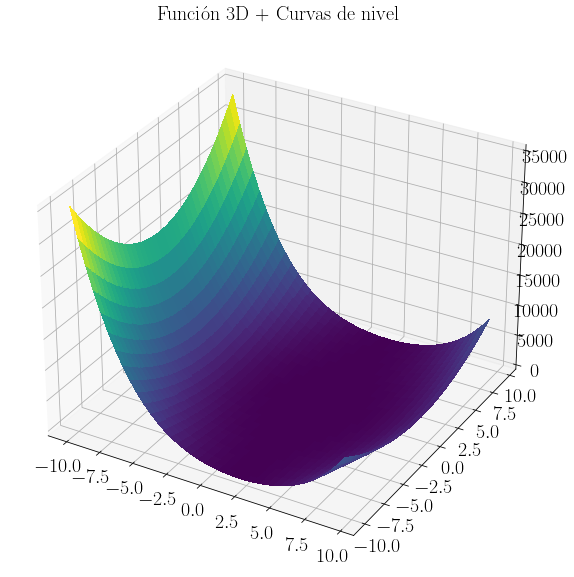

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

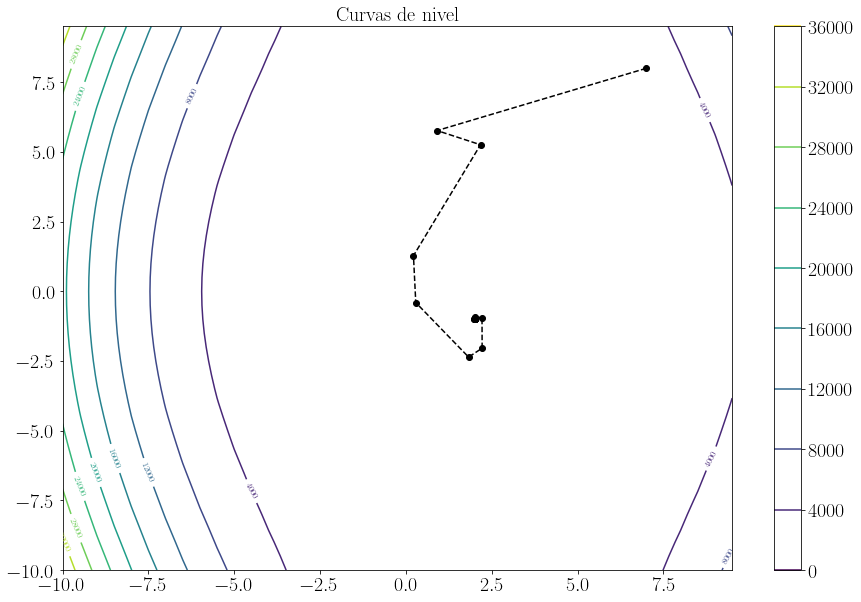

In [11]:
plt.figure(figsize=(15,10))
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

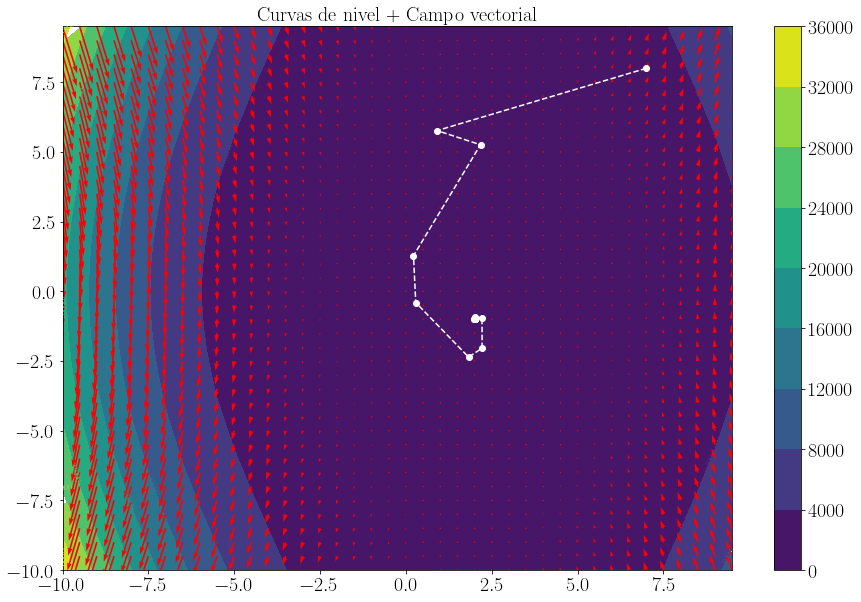

In [12]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

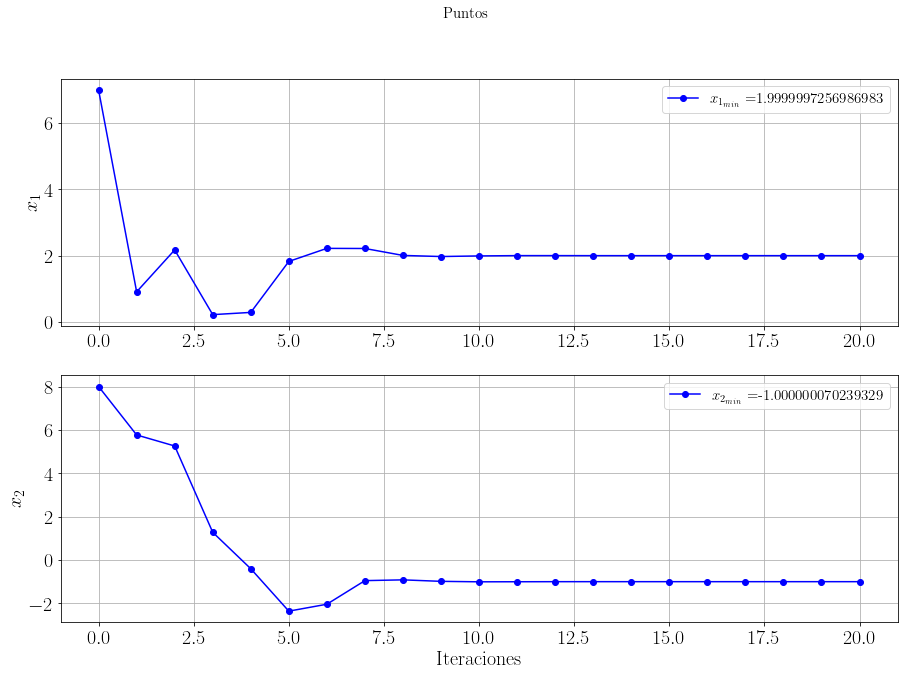

In [13]:
iterations = np.arange(0,len(xk))

fig, axs = plt.subplots(2, figsize = (15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso II. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de NCG para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 10 & 0 \end{bmatrix}^{T}.
\end{equation}

In [14]:
x0 = np.array([10,0]) # Puntos iniciales

tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] Constante de Armijo (opcional)
c2 = 0.1 # Constante de Wolfe (opcional)
    
# Función objetivo
F = lambda x: np.power((x[0] + 2*x[1] - 7),2) + np.power((2*x[0] + x[1] - 5),2)
gradF = lambda x: np.array([8*x[1] + 10*x[0] - 34,10*x[1] + 8*x[0] - 38])
B = lambda x: np.array([[10, 8],
                                                [8, 10]])
    
Fmin, xk = nl_conjugate_gradient(F, gradF, x0, 'FR', c1, c2, tol)

## Graficación de resultados

In [15]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2:  (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

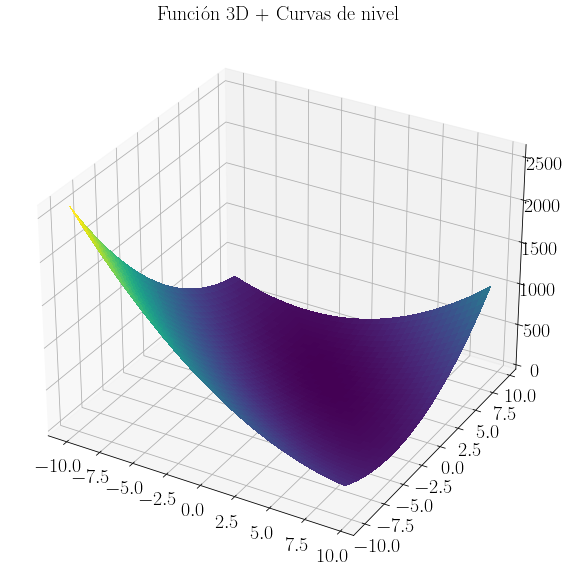

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

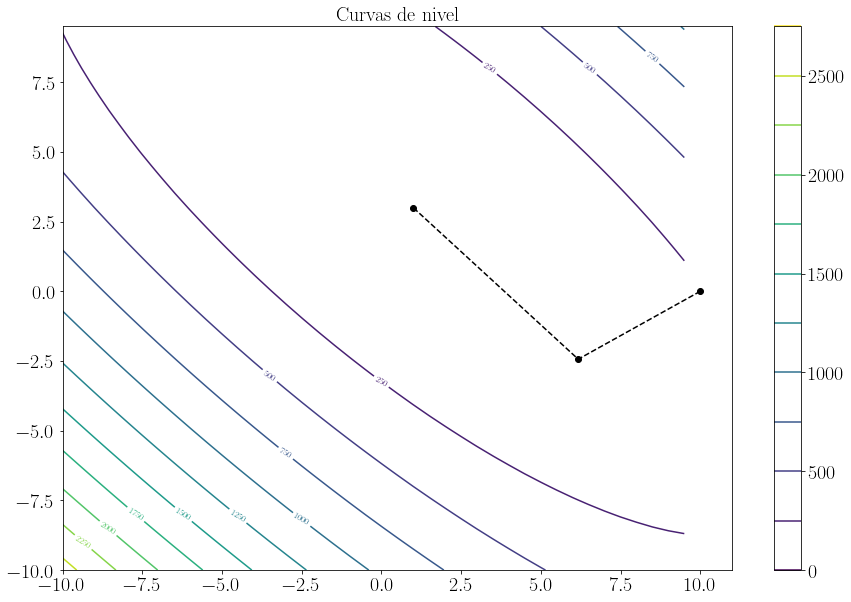

In [17]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

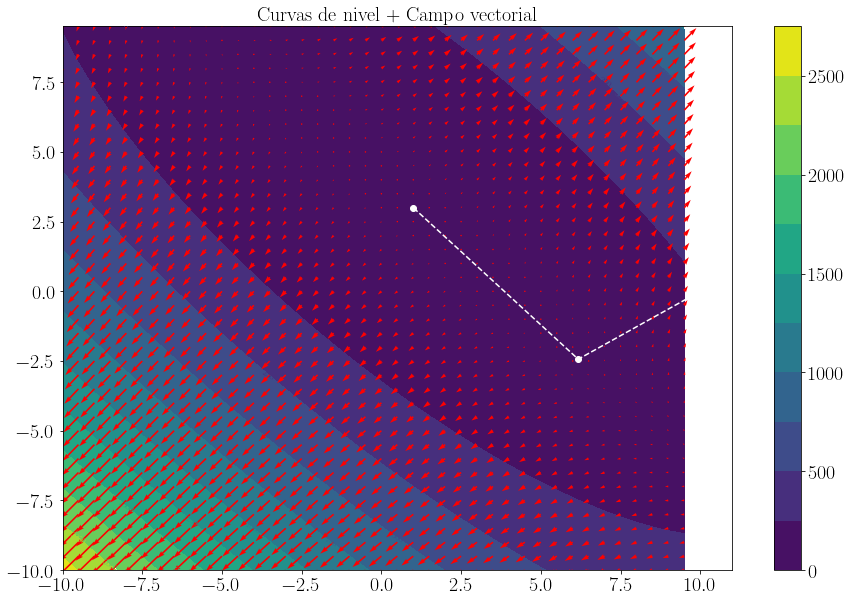

In [18]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

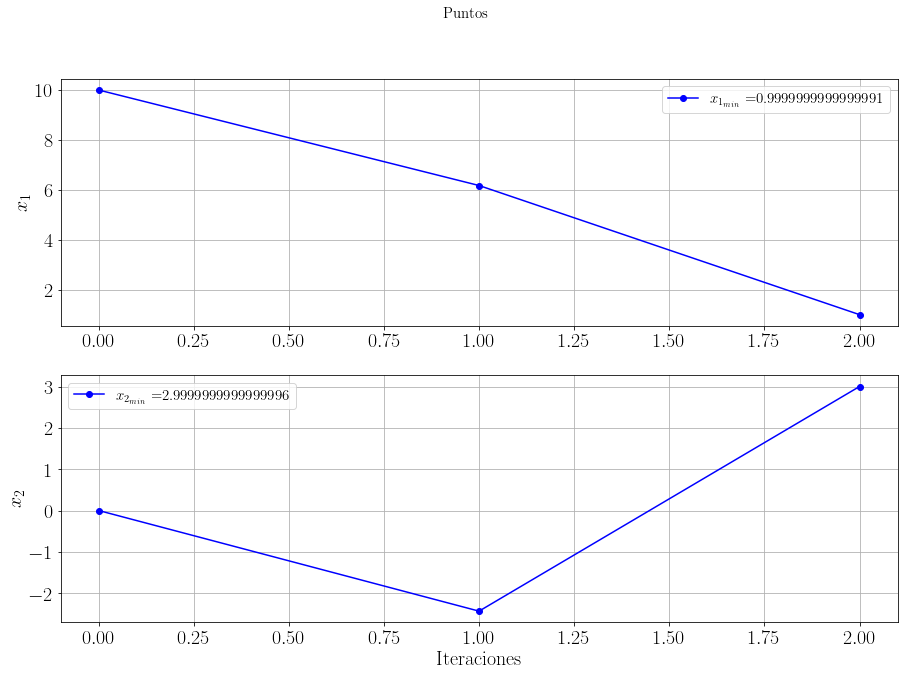

In [19]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2, figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
# axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$')
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
# axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$')
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso III. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de NCG para minimizar la función de Matyas considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 5 & -5 \end{bmatrix}^{T}.
\end{equation}

In [20]:
x0 = np.array([5,-5]) # Puntos iniciales
    
tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] Constante de Armijo (opcional)
c2 = 0.1 # Constante de Wolfe (opcional)
    
# Función objetivo
F = lambda x: 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]
gradF = lambda x: np.array([-(12*x[1]-13*x[0])/25,
                                                           (13*x[1]-12*x[0])/25])
B = lambda x: np.array([[0.52, -0.48],
                                                [-0.48, 0.52]])
    
Fmin, xk = nl_conjugate_gradient(F, gradF, x0, 'FR', c1, c2, tol)

## Graficación de resultados

In [21]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

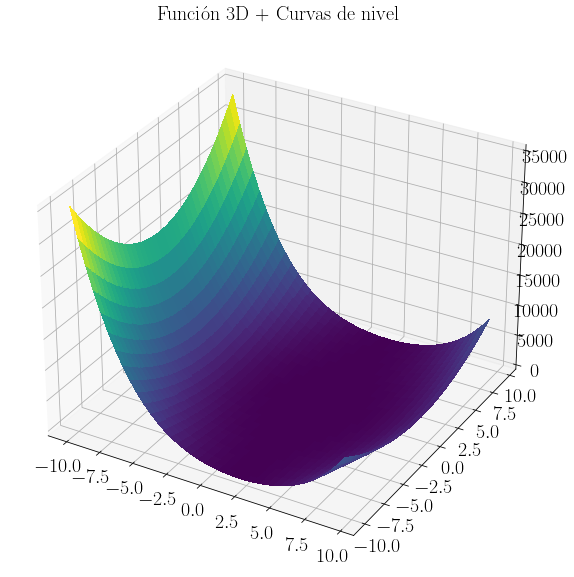

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

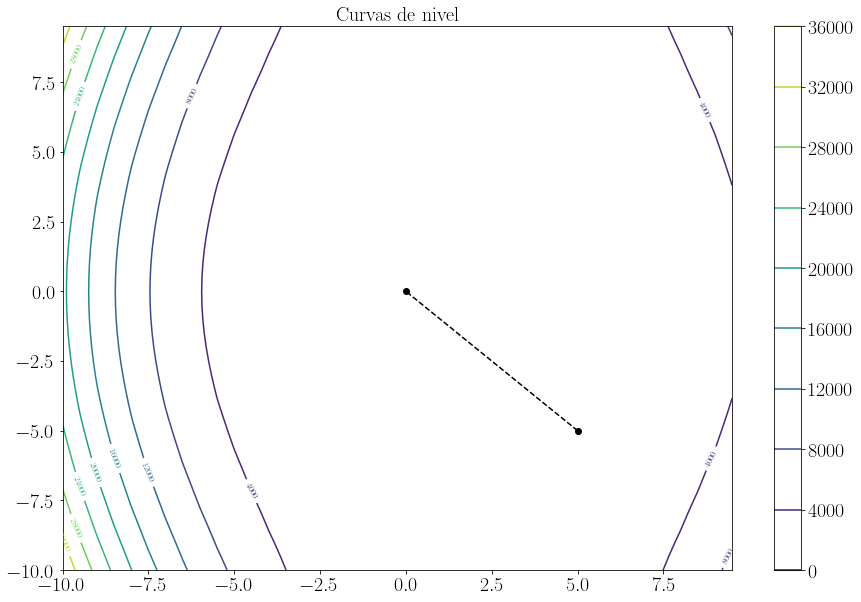

In [23]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

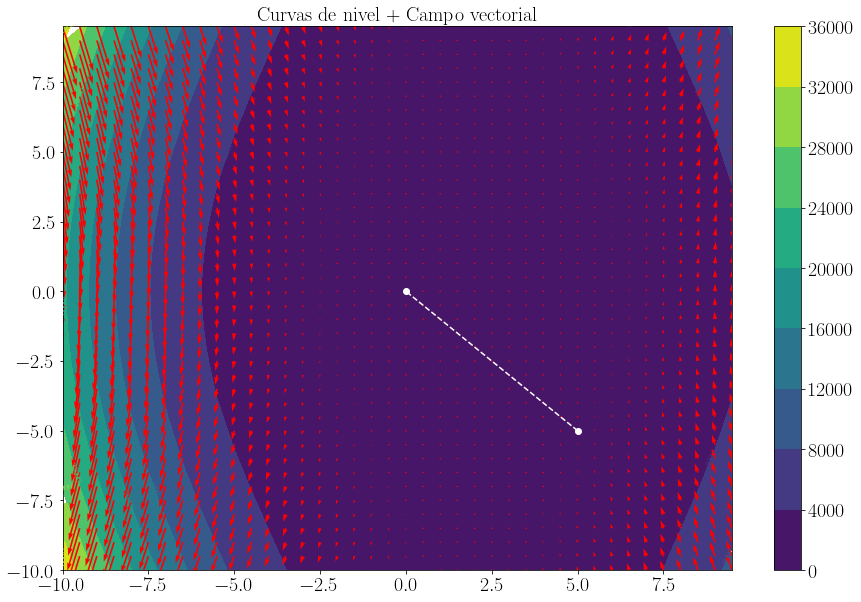

In [24]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

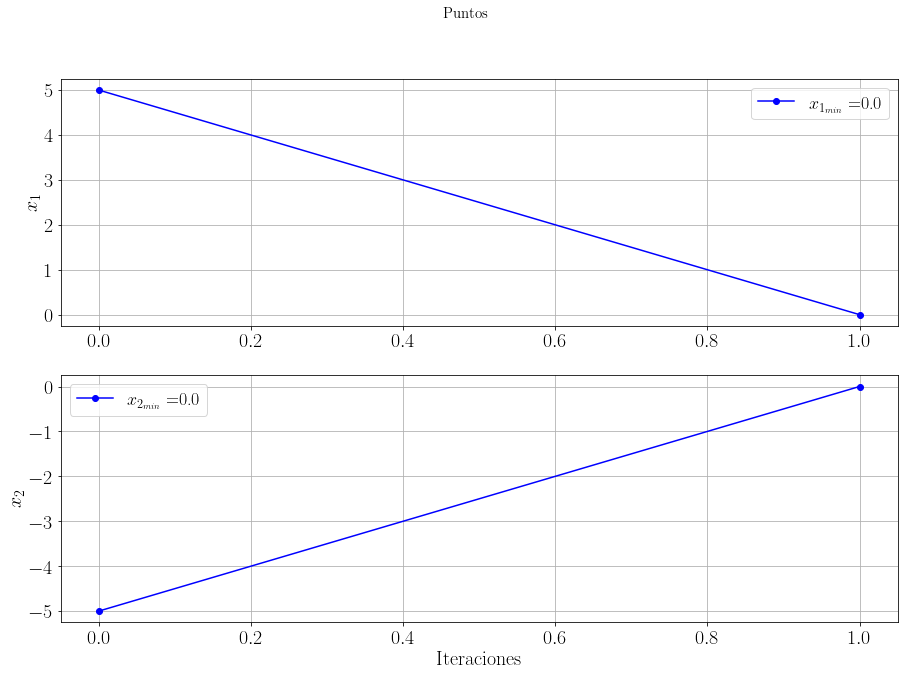

In [25]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Caso IV. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de NCG para minimizar la función de Beale considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} -3 & 3 \end{bmatrix}^{T}.
\end{equation}

# Caso V. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1}^2+x_{2}-11\right)^2 + \left(x_{1} + x_{2}^2-7\right)^2,
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de LS.

In [26]:
x0 = np.array([-5,5]) # Puntos iniciales
    
tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] Constante de Armijo (opcional)
c2 = 0.1 # Constante de Wolfe (opcional)
    
# Función objetivo
F = lambda x: (x[0]**2+x[1]-11)**2 + (x[0] + x[1]**2-7)**2
gradF = lambda x: np.array([2*x[1]**2+4*x[0]*x[1]+4*x[0]**3-42*x[0]-14,
                                                         4*x[1]**3+(4*x[0]-26)*x[1]+2*x[0]**2-22])
B = lambda x: np.array([[4*(x[1]+x[0]**2-11)+8*x[0]**2+2, 4*x[1]+4*x[0]],
                                                [4*x[1]+4*x[0], 4*(x[1]**2+x[0]-7)+8*x[1]**2+2]])
    
Fmin, xk = nl_conjugate_gradient(F, gradF, x0, 'FR', c1, c2, tol)

## Graficación de resultados

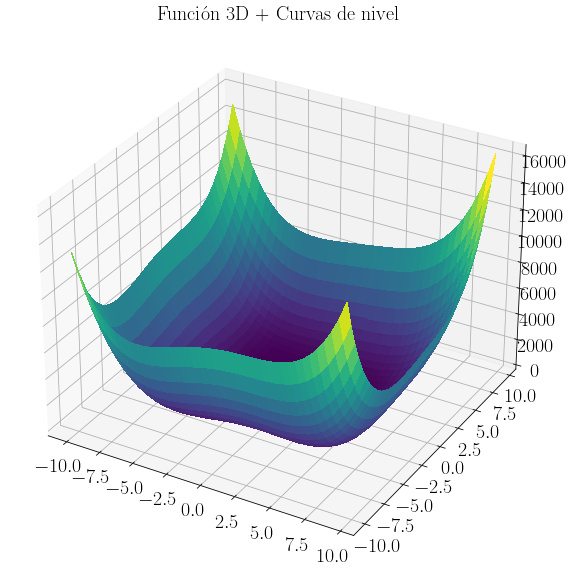

In [27]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1**2+x2-11)**2 + (x1 + x2**2-7)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

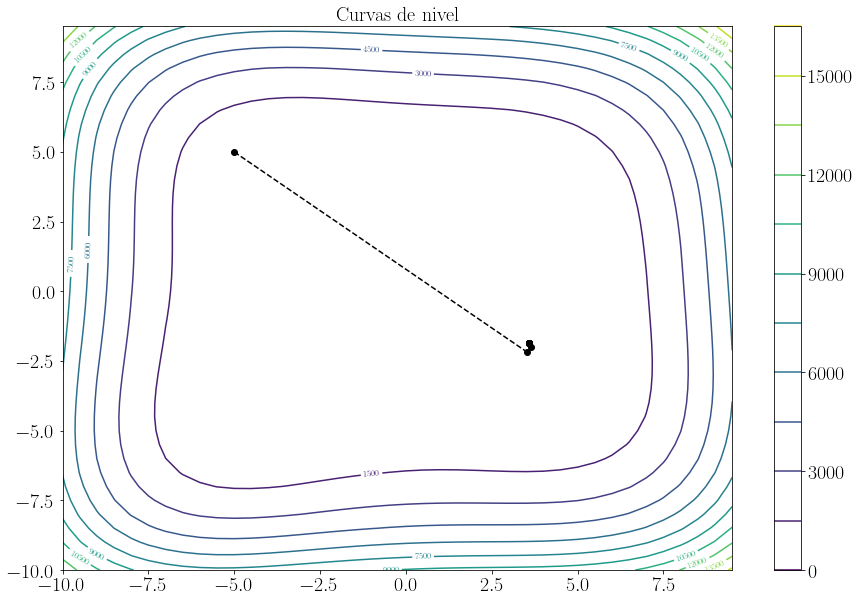

In [28]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

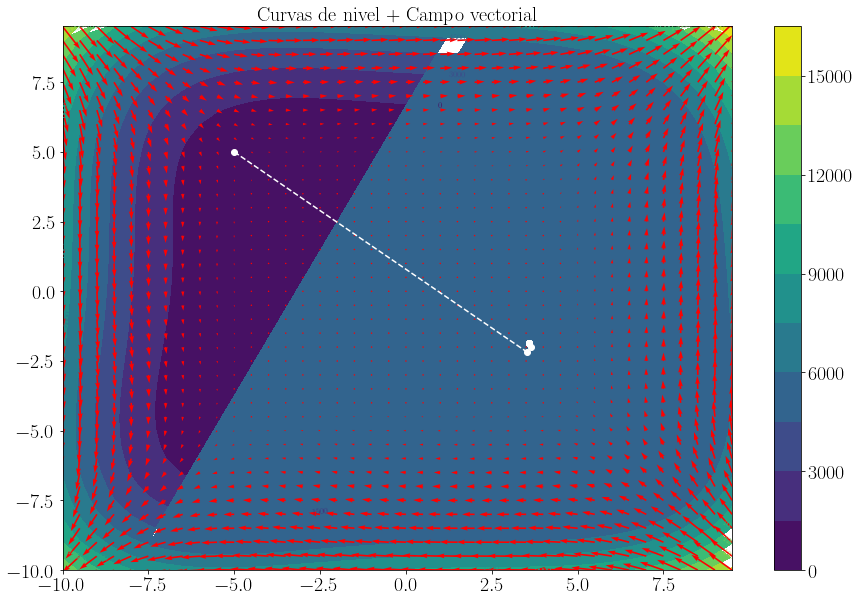

In [29]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 15)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

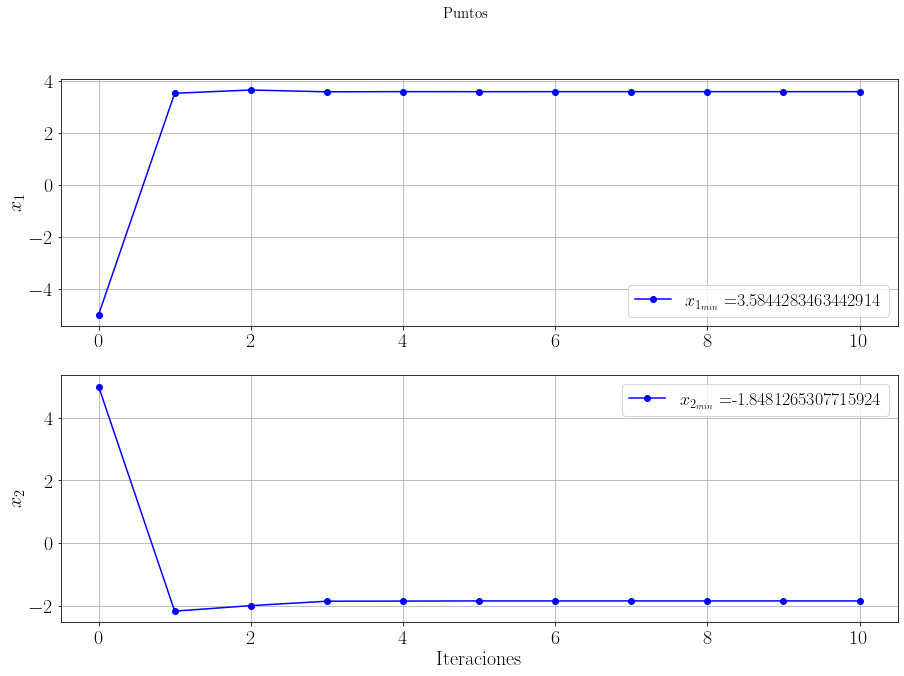

In [30]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(xk[-1,0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(xk[-1,1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Referencias
[1] Fletcher, Reeves, and Colin M. Reeves. "Function minimization by conjugate gradients." *The computer journal* 7.2 (1964): 149-154.

[2] Dai, Y. H., & Yuan, Y. (2000). Nonlinear conjugate gradient methods. *Shanghai Science and Technology Publisher*, Shanghai.

[3] Hager, W. W., & Zhang, H. (2006). A survey of nonlinear conjugate gradient methods. *Pacific journal of Optimization*, 2(1), 35-58.

[4] Ernesto, R. W., Ernesto, L. G., Rafael, B., & Yolanda, G. G. (2016). Perfiles de comportamiento numérico de los métodos de búsqueda immune network algorithm y bacterial foraging optimization algorithm en funciones benchmark. *Ingeniería, investigación y tecnología*, 17(4), 479-490.